# HW 3
# Yuwei Bao
# 9/15/2024

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split

## HW 3-1

Modify the previous linear classifier example.
- Shuffle then split the data: use first 80% for training
and remaining 20% for testing.
- Add a hidden layer with 5 nodes and relu activation.
- Modify the rest of the affected parts of the codes.
- Run the training step for 400 times.
- What is training and test accuracy after training?
- Repeat the above procedures with learning rates of 0.05, 0.1, and 0.5.
- Don’t forget to randomly initialize the model between
trials

### Example in the slides

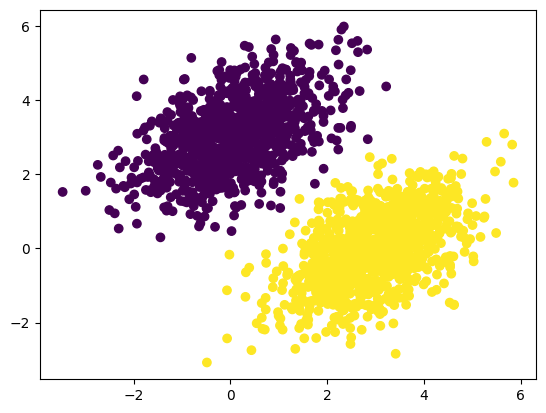

Loss at step 0: 3.5673
Loss at step 1: 0.5480
Loss at step 2: 0.1864
Loss at step 3: 0.1331
Loss at step 4: 0.1190
Loss at step 5: 0.1105
Loss at step 6: 0.1032
Loss at step 7: 0.0966
Loss at step 8: 0.0905
Loss at step 9: 0.0850
Loss at step 10: 0.0799
Loss at step 11: 0.0753
Loss at step 12: 0.0710
Loss at step 13: 0.0671
Loss at step 14: 0.0635
Loss at step 15: 0.0602
Loss at step 16: 0.0572
Loss at step 17: 0.0545
Loss at step 18: 0.0519
Loss at step 19: 0.0496
Loss at step 20: 0.0475
Loss at step 21: 0.0455
Loss at step 22: 0.0438
Loss at step 23: 0.0421
Loss at step 24: 0.0406
Loss at step 25: 0.0393
Loss at step 26: 0.0380
Loss at step 27: 0.0369
Loss at step 28: 0.0358
Loss at step 29: 0.0348
Loss at step 30: 0.0340
Loss at step 31: 0.0331
Loss at step 32: 0.0324
Loss at step 33: 0.0317
Loss at step 34: 0.0311
Loss at step 35: 0.0305
Loss at step 36: 0.0300
Loss at step 37: 0.0295
Loss at step 38: 0.0291
Loss at step 39: 0.0287


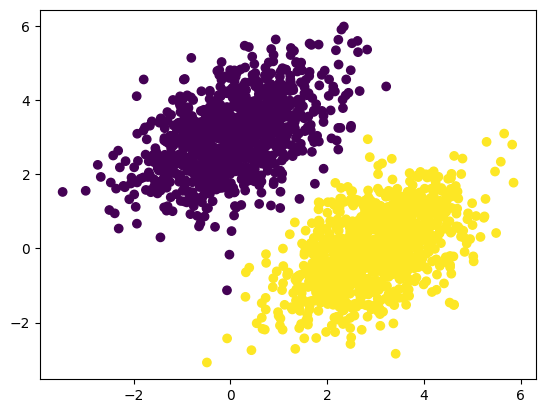

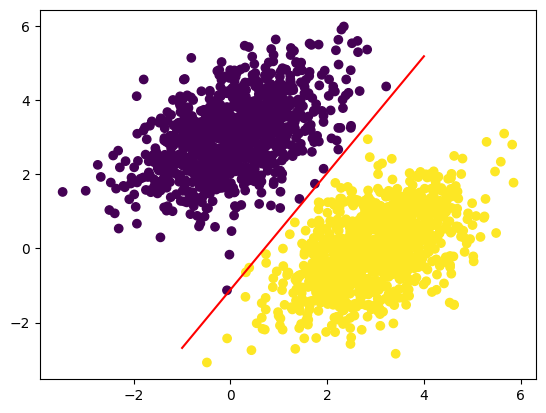

In [ ]:
# Generate two classes of 2000 random normal points in 2D
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

# Generate the corresponding targets (0 and 1)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), np.ones((num_samples_per_class, 1), dtype="float32")))

# Plot the two-point classes
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

# Define the linear classifier parameter variables
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

# Define the model (=forward pass function)
def model(inputs):
  return tf.matmul(inputs, W) + b

# Define the mean squared error loss function
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

# Define the training step function
learning_rate = 0.1
def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W,b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

# Run the training step for 40 times using all training data
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

# Plot the learned classifier and predicted classes
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:,0] > 0.5)
plt.show()
x = np.linspace(-1, 4, 100)
y = - W[0]/ W[1]*x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)


### Codes

In [ ]:
# Generate two classes of 2000 random normal points in 2D
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

# Generate the corresponding targets (0 and 1)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), np.ones((num_samples_per_class, 1), dtype="float32")))

# Split 80% trianing and 20% testing
train_inputs, test_inputs, train_targets, test_targets = train_test_split(inputs, targets, test_size=0.2, shuffle=True)

# Define the linear classifier parameter variables with adding a hidden layer with 5 nodes and relu activation
input_dim = 2
output_dim = 1
hidden_dim = 5

# Hidden layer
W_hidden = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, hidden_dim)))
b_hidden = tf.Variable(initial_value=tf.zeros(shape=(hidden_dim,)))

# Linear layer
W = tf.Variable(initial_value=tf.random.uniform(shape=(hidden_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

# Define the model (=forward pass function)
def model(inputs):
  # Hidden layer with relu activation
  hidden_output = tf.nn.relu(tf.matmul(inputs, W_hidden) + b_hidden)
  return tf.matmul(hidden_output, W) + b

# Define the mean squared error loss function
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

# Define the training step function
learning_rate = 0.1
def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
  grad_loss_wrt_W_hidden, grad_loss_wrt_b_hidden, grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W_hidden, b_hidden, W, b])
  W_hidden.assign_sub(grad_loss_wrt_W_hidden * learning_rate)
  b_hidden.assign_sub(grad_loss_wrt_b_hidden * learning_rate)
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

# Calculate accuracy
def compute_accuracy(inputs, targets):
    predictions = model(inputs)
    predicted_classes = tf.cast(predictions > 0.5, tf.float32)  # Convert to binary (0 or 1)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted_classes, targets), tf.float32))
    return accuracy

# Run the training step for n times using all training data
n = 400

for step in range(n):
  loss = training_step(inputs, targets)
  # Check if this is the last step
  if step == n-1:  # Last step is step 399 since range(400) goes from 0 to 399
      train_accuracy = compute_accuracy(train_inputs, train_targets)
      test_accuracy = compute_accuracy(test_inputs, test_targets)
      print(f" Learning rate = {learning_rate:.2f} | Step {step + 1}: Loss = {loss:.4f}, Final Training Accuracy = {train_accuracy:.4f}, Final Test Accuracy = {test_accuracy:.4f}")



 Learning rate = 0.10 | Step 400: Loss = 0.2422, Final Training Accuracy = 0.5319, Final Test Accuracy = 0.5300


### Codes with learning rates of with learning rates of 0.05, 0.1, and 0.5

In [ ]:
# Linear classifier with a relu hidden layer
def create_model():
    input_dim = 2
    hidden_dim = 5
    output_dim = 1

      # Hidden layer
    W_hidden = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, hidden_dim)))
    b_hidden = tf.Variable(initial_value=tf.zeros(shape=(hidden_dim,)))

    # Linear layer
    W = tf.Variable(initial_value=tf.random.uniform(shape=(hidden_dim, output_dim)))
    b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

    # Define the model (=forward pass function)
    def model(inputs):
      # Hidden layer with relu activation
      hidden_output = tf.nn.relu(tf.matmul(inputs, W_hidden) + b_hidden)
      return tf.matmul(hidden_output, W) + b

    return model, [W_hidden, b_hidden, W, b]

# Define the mean squared error loss function
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

# Calculate accuracy
def compute_accuracy(inputs, targets, model):
    predictions = model(inputs)
    predicted_classes = tf.cast(predictions > 0.5, tf.float32)  # Convert to binary (0 or 1)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted_classes, targets), tf.float32))
    return accuracy

# Train the model with a specified learning rate
def train_model(learning_rate, train_inputs, train_targets, test_inputs, test_targets):
    # Create a new model for each experiment
    model, variables = create_model()

    # Training step function
    def training_step(inputs, targets):
      with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
      # The following has been packed and processed in create_model
      # grad_loss_wrt_W_hidden, grad_loss_wrt_b_hidden, grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W_hidden, b_hidden, W, b])
      # W_hidden.assign_sub(grad_loss_wrt_W_hidden * learning_rate)
      # b_hidden.assign_sub(grad_loss_wrt_b_hidden * learning_rate)
      # W.assign_sub(grad_loss_wrt_W * learning_rate)
      # b.assign_sub(grad_loss_wrt_b * learning_rate)
      # return loss
      gradients = tape.gradient(loss, variables)
      for var, grad in zip(variables, gradients):
            var.assign_sub(grad * learning_rate)
      return loss

    # Run the training step for n times using all training data
    n = 400
    for step in range(n):
        loss = training_step(train_inputs, train_targets)
        if step == n-1:  # Last step, print accuracy
            train_accuracy = compute_accuracy(train_inputs, train_targets, model)
            test_accuracy = compute_accuracy(test_inputs, test_targets, model)
            print(f"Learning rate {learning_rate} | Step {step + 1}: Loss = {loss:.4f}, Final Training Accuracy = {train_accuracy:.4f}, Final Test Accuracy = {test_accuracy:.4f}")



#### Codes with learning rates of with learning rates of 0.05

In [ ]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0, 3], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), np.ones((num_samples_per_class, 1), dtype="float32")))

train_inputs, test_inputs, train_targets, test_targets = train_test_split(inputs, targets, test_size=0.2, shuffle=True)

# # Run above training with different learning rates
# for lr in [0.05, 0.1, 0.5]:
lr = 0.05
train_model(learning_rate=lr, train_inputs=train_inputs, train_targets=train_targets, test_inputs=test_inputs, test_targets=test_targets)

Learning rate 0.05 | Step 400: Loss = 0.0219, Final Training Accuracy = 0.9937, Final Test Accuracy = 0.9950


#### Codes with learning rates of with learning rates of 0.1

In [ ]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0, 3], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), np.ones((num_samples_per_class, 1), dtype="float32")))

train_inputs, test_inputs, train_targets, test_targets = train_test_split(inputs, targets, test_size=0.2, shuffle=True)

lr = 0.1
train_model(learning_rate=lr, train_inputs=train_inputs, train_targets=train_targets, test_inputs=test_inputs, test_targets=test_targets)

Learning rate 0.1 | Step 400: Loss = 0.0194, Final Training Accuracy = 0.9969, Final Test Accuracy = 0.9950


#### Codes with learning rates of with learning rates of 0.5

In [ ]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0, 3], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), np.ones((num_samples_per_class, 1), dtype="float32")))

train_inputs, test_inputs, train_targets, test_targets = train_test_split(inputs, targets, test_size=0.2, shuffle=True)

lr = 0.5
train_model(learning_rate=lr, train_inputs=train_inputs, train_targets=train_targets, test_inputs=test_inputs, test_targets=test_targets)

Learning rate 0.5 | Step 400: Loss = nan, Final Training Accuracy = 0.4988, Final Test Accuracy = 0.5050


**Tried multiple times but when the learning rate is 0.5, the loss function is always nan. The possible reason could be learge learning rate leads to larget gradient updates, which leads to the model's parameters grow exponentially.**

## HW 3-2

(p.37)

This problem is a bit open-ended. Modify your own cifar10 code from HW 2.

Try different optimizers (look up the keras doc.)
Try different losses (look up the keras doc.)
Try different # of epochs.
Try different learning rate.
Report the training and the test accuracy for each hyperparameter combination above. Try at least 20 different combinations.
Which achieves the best test accuracy?

### Codes from HW2
### Combination 1

In [2]:
from tensorflow.keras.datasets import cifar10
# Load data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Model
model = keras.Sequential([
  layers.Dense(512, activation="relu"),
  layers.Dense(10, activation="softmax")
])

# Compilation
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Preparing the image data; adjust the dataset size
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype("float32") / 255

# Training
model.fit(train_images, train_labels, epochs=5, batch_size=128)

# Calculate test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc for 5 epoch: {test_acc}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2064 - loss: 3.3894
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3441 - loss: 1.8310
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3860 - loss: 1.7294
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4077 - loss: 1.6662
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4231 - loss: 1.6249
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4188 - loss: 1.6186
test_acc for 5 epoch: 0.41679999232292175


### Combination 2

In [3]:
# Load data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Model
model = keras.Sequential([
  layers.Dense(512, activation="relu"),
  layers.Dense(10, activation="softmax")
])

# Compilation
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Preparing the image data; adjust the dataset size
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype("float32") / 255

# Training
model.fit(train_images, train_labels, epochs=10, batch_size=128)

# Calculate test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2102 - loss: 3.1258
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3429 - loss: 1.8226
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3837 - loss: 1.7302
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4068 - loss: 1.6708
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4188 - loss: 1.6326
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4390 - loss: 1.5910
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4470 - loss: 1.5609
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4561 - loss: 1.5420
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4642 - loss: 1.5122
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4671 - loss: 1.5141
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4402 - loss: 1.5616
test_acc: 0.44290000200271606


### Combination 3

In [4]:
# Load data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Model
model = keras.Sequential([
  layers.Dense(512, activation="relu"),
  layers.Dense(10, activation="softmax")
])

# Compilation
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Preparing the image data; adjust the dataset size
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype("float32") / 255

# Training
model.fit(train_images, train_labels, epochs=10, batch_size=128)

# Calculate test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2669 - loss: 2.2477
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3814 - loss: 1.7475
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4073 - loss: 1.6636
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4412 - loss: 1.5842
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4519 - loss: 1.5467
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4591 - loss: 1.5258
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4700 - loss: 1.4925
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4775 - loss: 1.4730
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4830 - loss: 1.4693
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4946 - loss: 1.4396
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4846 - loss: 1.4714
test_acc: 0.48539999127388


### Combination 4

In [5]:
# Load data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Model
model = keras.Sequential([
  layers.Dense(512, activation="relu"),
  layers.Dense(10, activation="softmax")
])

# Compilation
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.05), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Preparing the image data; adjust the dataset size
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype("float32") / 255

# Training
model.fit(train_images, train_labels, epochs=10, batch_size=128)

# Calculate test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0993 - loss: 46.0490
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0977 - loss: 2.3044
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0970 - loss: 2.3049
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1001 - loss: 2.3051
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1006 - loss: 2.3052
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0998 - loss: 2.3062
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0970 - loss: 2.3062
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0973 - loss: 2.3062
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0998 - loss: 2.3064
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0972 - loss: 2.3061
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1036 - loss: 2.3049
test_acc: 0.10000000149011612


### Combination 5

In [6]:
# Load data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Model
model = keras.Sequential([
  layers.Dense(512, activation="relu"),
  layers.Dense(10, activation="softmax")
])

# Compilation
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.5), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Preparing the image data; adjust the dataset size
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype("float32") / 255

# Training
model.fit(train_images, train_labels, epochs=10, batch_size=128)

# Calculate test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0977 - loss: 2038.9387
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0984 - loss: 2.3166
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1000 - loss: 2.3244
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1003 - loss: 2.3294
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1018 - loss: 2.3274
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1025 - loss: 2.3253
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0999 - loss: 2.3273
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0995 - loss: 2.3282
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1018 - loss: 2.3285
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0995 - loss: 2.3329
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1006 - loss: 2.3443
test_acc: 0.10000000149011612


### Combination 6

In [7]:
# Load data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Model
model = keras.Sequential([
  layers.Dense(512, activation="relu"),
  layers.Dense(10, activation="softmax")
])

# Compilation
model.compile(optimizer=keras.optimizers.Adadelta(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Preparing the image data; adjust the dataset size
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype("float32") / 255

# Training
model.fit(train_images, train_labels, epochs=10, batch_size=128)

# Calculate test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1228 - loss: 2.3031
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2135 - loss: 2.1778
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2543 - loss: 2.1141
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2745 - loss: 2.0733
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2943 - loss: 2.0367
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3002 - loss: 2.0116
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3065 - loss: 1.9948
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3141 - loss: 1.9743
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3228 - loss: 1.9601
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3271 - loss: 1.9470
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3368 - loss: 1.9391
test_acc: 0.3327000141143799


### Combination 7

In [8]:
# Load data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Model
model = keras.Sequential([
  layers.Dense(512, activation="relu"),
  layers.Dense(10, activation="softmax")
])

# Compilation
model.compile(optimizer=keras.optimizers.Adadelta(learning_rate=1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Preparing the image data; adjust the dataset size
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype("float32") / 255

# Training
model.fit(train_images, train_labels, epochs=10, batch_size=128)

# Calculate test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1540 - loss: 2.2968
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1953 - loss: 2.1769
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2401 - loss: 2.1138
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2620 - loss: 2.0702
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2812 - loss: 2.0357
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2957 - loss: 2.0117
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3042 - loss: 1.9898
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3128 - loss: 1.9743
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3175 - loss: 1.9568
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3277 - loss: 1.9424
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3298 - loss: 1.9404
test_acc: 0.3278999924659729


### Combination 8

In [9]:
# Load data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Model
model = keras.Sequential([
  layers.Dense(512, activation="relu"),
  layers.Dense(10, activation="softmax")
])

# Compilation
model.compile(optimizer=keras.optimizers.Adafactor(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Preparing the image data; adjust the dataset size
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype("float32") / 255

# Training
model.fit(train_images, train_labels, epochs=10, batch_size=128)

# Calculate test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2512 - loss: 2.0776
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3606 - loss: 1.8304
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3930 - loss: 1.7508
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4052 - loss: 1.7116
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4149 - loss: 1.6762
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4335 - loss: 1.6393
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4446 - loss: 1.6177
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4494 - loss: 1.5948
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4539 - loss: 1.5719
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4584 - loss: 1.5613
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4523 - loss: 1.5698
test_acc: 0.45210000872612


### Combination 9

In [10]:
# Load data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Model
model = keras.Sequential([
  layers.Dense(512, activation="relu"),
  layers.Dense(10, activation="softmax")
])

# Compilation
model.compile(optimizer=keras.optimizers.Adafactor(learning_rate=0.01), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Preparing the image data; adjust the dataset size
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype("float32") / 255

# Training
model.fit(train_images, train_labels, epochs=10, batch_size=128)

# Calculate test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2474 - loss: 2.1104
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3663 - loss: 1.7718
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4053 - loss: 1.6698
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4277 - loss: 1.6048
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4459 - loss: 1.5621
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4603 - loss: 1.5228
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4698 - loss: 1.4921
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4778 - loss: 1.4709
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4876 - loss: 1.4468
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5050 - loss: 1.4093
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4535 - loss: 1.5223
test_acc: 0.45399999618530273


### Combination 10

In [11]:
# Load data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Model
model = keras.Sequential([
  layers.Dense(512, activation="relu"),
  layers.Dense(10, activation="softmax")
])

# Compilation
model.compile(optimizer=keras.optimizers.Adafactor(learning_rate=0.05), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Preparing the image data; adjust the dataset size
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype("float32") / 255

# Training
model.fit(train_images, train_labels, epochs=10, batch_size=128)

# Calculate test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2099 - loss: 2.4397
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3335 - loss: 1.8489
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3817 - loss: 1.7375
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4014 - loss: 1.6805
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4183 - loss: 1.6391
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4315 - loss: 1.5942
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4413 - loss: 1.5779
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4525 - loss: 1.5527
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4587 - loss: 1.5383
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4706 - loss: 1.5035
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4473 - loss: 1.5512
test_acc: 0.4465999901294708


### Combination 11

In [12]:
# Load data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Model
model = keras.Sequential([
  layers.Dense(512, activation="relu"),
  layers.Dense(10, activation="softmax")
])

# Compilation
model.compile(optimizer=keras.optimizers.Adagrad(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Preparing the image data; adjust the dataset size
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype("float32") / 255

# Training
model.fit(train_images, train_labels, epochs=10, batch_size=128)

# Calculate test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2159 - loss: 2.1721
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3303 - loss: 1.9371
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3531 - loss: 1.8744
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3641 - loss: 1.8354
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3782 - loss: 1.8040
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3825 - loss: 1.7853
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3931 - loss: 1.7639
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3978 - loss: 1.7503
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4007 - loss: 1.7371
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4070 - loss: 1.7200
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4078 - loss: 1.7268
test_acc: 0.40290001034736633


### Combination 12

In [13]:
# Load data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Model
model = keras.Sequential([
  layers.Dense(512, activation="relu"),
  layers.Dense(10, activation="softmax")
])

# Compilation
model.compile(optimizer=keras.optimizers.Lion(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Preparing the image data; adjust the dataset size
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype("float32") / 255

# Training
model.fit(train_images, train_labels, epochs=10, batch_size=128)

# Calculate test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2713 - loss: 2.2516
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4046 - loss: 1.6810
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4271 - loss: 1.6056
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4411 - loss: 1.5673
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4566 - loss: 1.5420
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4536 - loss: 1.5348
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4589 - loss: 1.5251
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4617 - loss: 1.5086
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4691 - loss: 1.4950
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4768 - loss: 1.4794
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4522 - loss: 1.5370
test_acc: 0.4514000117778778


### Combination 13

In [14]:
# Load data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Model
model = keras.Sequential([
  layers.Dense(512, activation="relu"),
  layers.Dense(10, activation="softmax")
])

# Compilation
model.compile(optimizer=keras.optimizers.Lion(learning_rate=0.001), loss=keras.losses.CategoricalFocalCrossentropy, metrics=["accuracy"])

# Preparing the image data; adjust the dataset size
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype("float32") / 255

# Training
model.fit(train_images, train_labels, epochs=10, batch_size=128)

# Calculate test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0991 - loss: 25.0343
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1004 - loss: 20.9560
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0995 - loss: 20.9476
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1004 - loss: 21.0465
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1002 - loss: 21.0103
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1007 - loss: 21.0192
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0992 - loss: 21.0692
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1027 - loss: 20.8973
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1002 - loss: 20.9059
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0992 - loss: 20.9522
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0968 - loss: 21.1225
test_acc: 0.10000000149011612


### Combination 14

In [15]:
# Load data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Model
model = keras.Sequential([
  layers.Dense(512, activation="relu"),
  layers.Dense(10, activation="softmax")
])

# Compilation
model.compile(optimizer=keras.optimizers.Lion(learning_rate=0.001), loss=keras.losses.Hinge, metrics=["accuracy"])

# Preparing the image data; adjust the dataset size
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype("float32") / 255

# Training
model.fit(train_images, train_labels, epochs=10, batch_size=128)

# Calculate test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1011 - loss: 0.9025
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1010 - loss: 0.9098
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1000 - loss: 0.9097
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0987 - loss: 0.9100
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0984 - loss: 0.9099
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1017 - loss: 0.9099
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1021 - loss: 0.9100
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1000 - loss: 0.9101
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1004 - loss: 0.9101
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0994 - loss: 0.9101
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0987 - loss: 0.9100
test_acc: 0.10000000149011612


### Combination 15

In [17]:
# Load data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Model
model = keras.Sequential([
  layers.Dense(512, activation="relu"),
  layers.Dense(10, activation="softmax")
])

# Compilation
model.compile(optimizer=keras.optimizers.Ftrl(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Preparing the image data; adjust the dataset size
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype("float32") / 255

# Training
model.fit(train_images, train_labels, epochs=10, batch_size=128)

# Calculate test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1022 - loss: 2.3053
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1306 - loss: 2.3024
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0991 - loss: 2.3011
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0996 - loss: 2.2944
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1344 - loss: 2.2715
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1691 - loss: 2.2237
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1728 - loss: 2.1684
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1802 - loss: 2.1302
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1781 - loss: 2.1059
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1811 - loss: 2.0916
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2020 - loss: 2.0838
test_acc: 0.19609999656677246


### Combination 16

In [18]:
# Load data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Model
model = keras.Sequential([
  layers.Dense(512, activation="relu"),
  layers.Dense(10, activation="softmax")
])

# Compilation
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Preparing the image data; adjust the dataset size
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype("float32") / 255

# Training
model.fit(train_images, train_labels, epochs=10, batch_size=128)

# Calculate test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2544 - loss: 2.0665
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3581 - loss: 1.8250
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3922 - loss: 1.7517
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4052 - loss: 1.7110
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4152 - loss: 1.6848
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4251 - loss: 1.6542
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4413 - loss: 1.6170
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4474 - loss: 1.5950
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4524 - loss: 1.5801
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4575 - loss: 1.5580
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4511 - loss: 1.5701
test_acc: 0.44760000705718994


### Combination 17

In [19]:
# Load data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Model
model = keras.Sequential([
  layers.Dense(512, activation="relu"),
  layers.Dense(10, activation="softmax")
])

# Compilation
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Preparing the image data; adjust the dataset size
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype("float32") / 255

# Training
model.fit(train_images, train_labels, epochs=10, batch_size=128)

# Calculate test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2241 - loss: 2.2553
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3565 - loss: 1.7996
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3923 - loss: 1.7101
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4165 - loss: 1.6447
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4351 - loss: 1.6043
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4419 - loss: 1.5702
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4536 - loss: 1.5382
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4680 - loss: 1.5093
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4757 - loss: 1.4895
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4857 - loss: 1.4583
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4413 - loss: 1.6100
test_acc: 0.43320000171661377


### Combination 18

In [20]:
# Load data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Model
model = keras.Sequential([
  layers.Dense(512, activation="relu"),
  layers.Dense(10, activation="softmax")
])

# Compilation
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Preparing the image data; adjust the dataset size
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype("float32") / 255

# Training
model.fit(train_images, train_labels, epochs=30, batch_size=128)

# Calculate test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2602 - loss: 2.3063
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3803 - loss: 1.7362
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4144 - loss: 1.6574
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4377 - loss: 1.5969
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4492 - loss: 1.5574
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4560 - loss: 1.5399
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4723 - loss: 1.4983
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4735 - loss: 1.4883
Epoch 9/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4773 - loss: 1.4723
Epoch 10/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4899 - loss: 1.4401
Epoch 11/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4940 - loss: 1.4319
Epoch 12/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

### Combination 20

In [21]:
# Load data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Model
model = keras.Sequential([
  layers.Dense(512, activation="relu"),
  layers.Dense(10, activation="softmax")
])

# Compilation
model.compile(optimizer=keras.optimizers.Adafactor(learning_rate=0.01), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Preparing the image data; adjust the dataset size
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype("float32") / 255

# Training
model.fit(train_images, train_labels, epochs=50, batch_size=128)

# Calculate test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2500 - loss: 2.0993
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3659 - loss: 1.7755
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4106 - loss: 1.6752
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4261 - loss: 1.6149
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4454 - loss: 1.5627
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4579 - loss: 1.5270
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4703 - loss: 1.4915
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4825 - loss: 1.4628
Epoch 9/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4885 - loss: 1.4438
Epoch 10/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4962 - loss: 1.4163
Epoch 11/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5041 - loss: 1.4048
Epoch 12/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

**The heighest accuracy combination I have is Adafactor optimizer with learning rate 0.01 with SparseCategoricalCrossentropy loss function and 50 epoches. From previous exploration, more epoches will lead to slightly bettwe accuracy. This experiement tried different combinations, their results are quite similar to each other. The better performance is not exremly significant. I do notice some extremly bad performance during the experiments. It is necessary to try different combinations to acheive better accuracy.**